# Model Testing
This file test the Model generation from different types of model. It also consider generic models. All the models input are from separate .json files in this same foler

## Importing Class

In [6]:
import simpy
from package.model_translator import Model

import importlib
import package #import the "module" (folder) with the codes
importlib.reload(package.model_translator) #reload this specifc module to upadte the class

<module 'package.model_translator' from 'c:\\Users\\pedro\\OneDrive - Politecnico di Milano\\Project\\Digital Twin\\Github\\Digital_Twin\\Digital_Twin\\Parallel_test\\digital_model\\package\\model_translator.py'>

Create the enviorment for the models

In [7]:
environment = simpy.Environment()

## 3 linear stations in a Open Loop

Inport the .json model

In [8]:
model_3stations_open_path = "models\model_3stations_open.json"

Create an object model to work with:

In [9]:
model_3stations_open = Model(name= "model_3stations_open", env= environment, model_path= model_3stations_open_path)


Run the main function: `model_translator()`. This fucntion will read the model in the json format and will translate the nodes and arcs into machine and queues objects. Those objects are stored in internal vectors of the Model Object and will be extract later.

In [10]:
model_3stations_open.model_translator()

Use the method `verbose()` to show the updated model:

In [11]:
model_3stations_open.verbose()

==========  Reading the Model: model_3stations_open  ==========
===> Big Picture
Total number of Machines: 3
Total number of Queues: 2

===>Detailed view of Queues:
----------------
Queue 1

--Intrinsic Properties--
Arc links: [1, 2]
Capacity: 10

--Current Status--
Queue Lenght: 0
----------------
----------------
Queue 2

--Intrinsic Properties--
Arc links: [2, 3]
Capacity: 10

--Current Status--
Queue Lenght: 0
----------------

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
None
--Queue Out:--
Queue 1
----------------
> Machine 2
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
----------------
> Machine 3
--Queue In:--
Queue 2
--Queue Out:--
None


## One to Mult

In [12]:
model_1tomult_path = "models\model_1tomult.json"
model_1tomult = Model(name= "model_1tomult", env= environment, model_path= model_1tomult_path)
model_1tomult.model_translator()
model_1tomult.verbose()

==========  Reading the Model: model_1tomult  ==========
===> Big Picture
Total number of Machines: 3
Total number of Queues: 2

===>Detailed view of Queues:
----------------
Queue 1

--Intrinsic Properties--
Arc links: [1, 2]
Capacity: 10

--Current Status--
Queue Lenght: 0
----------------
----------------
Queue 2

--Intrinsic Properties--
Arc links: [1, 3]
Capacity: 10

--Current Status--
Queue Lenght: 0
----------------

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
None
--Queue Out:--
Queue 1
Queue 2
----------------
> Machine 2
--Queue In:--
Queue 1
--Queue Out:--
None
----------------
> Machine 3
--Queue In:--
Queue 2
--Queue Out:--
None


## Mult to One

In [13]:
model_multto1_path = "models\model_multto1.json"
model_multto1 = Model(name= "model_multto1", env= environment, model_path= model_multto1_path)
model_multto1.model_translator()
model_multto1.verbose()
print(model_multto1)

==========  Reading the Model: model_multto1  ==========
===> Big Picture
Total number of Machines: 3
Total number of Queues: 2

===>Detailed view of Queues:
----------------
Queue 1

--Intrinsic Properties--
Arc links: [1, 3]
Capacity: 10

--Current Status--
Queue Lenght: 0
----------------
----------------
Queue 2

--Intrinsic Properties--
Arc links: [2, 3]
Capacity: 10

--Current Status--
Queue Lenght: 0
----------------

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
None
--Queue Out:--
Queue 1
----------------
> Machine 2
--Queue In:--
None
--Queue Out:--
Queue 2
----------------
> Machine 3
--Queue In:--
Queue 1
Queue 2
--Queue Out:--
None


## 2-S Model

In [14]:
environment = simpy.Environment()
model_2stations_closed_path = "models\model_2stations_closed.json"
model_2stations_closed = Model(name= "model_2stations_closed",model_path= model_2stations_closed_path, initial=True, env= environment, until= 200)
model_2stations_closed.model_translator()
model_2stations_closed.verbose()

==========  Reading the Model: model_2stations_closed  ==========
===> Big Picture
Total number of Machines: 2
Total number of Queues: 2

===>Detailed view of Queues:
----------------
Queue 1

--Intrinsic Properties--
Arc links: [1, 2]
Capacity: 10

--Current Status--
Queue Lenght: 0
----------------
----------------
Queue 2

--Intrinsic Properties--
Arc links: [2, 1]
Capacity: 10

--Current Status--
Parts stored: Part 1
Parts stored: Part 2
Parts stored: Part 3
Parts stored: Part 4
Parts stored: Part 5
Queue Lenght: 5
----------------

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 2
--Queue Out:--
Queue 1
----------------
> Machine 2
--Queue In:--
Queue 1
--Queue Out:--
Queue 2


In [15]:
model_2stations_closed.run()

Time: 0 - Machine 1 got Part 1
Time: 5 - Machine 1 put Part 1 in Queue 1
Time: 5 - Machine 1 got Part 2
Time: 5 - Machine 2 got Part 1
Time: 10 - Machine 1 put Part 2 in Queue 1
Time: 10 - Machine 1 got Part 3
Time: 10 - xxx Part 1 terminated xxx
Time: 10 - Part 6 replaced
Time: 10 - Machine 2 got Part 2
Time: 15 - Machine 1 put Part 3 in Queue 1
Time: 15 - Machine 1 got Part 4
Time: 15 - xxx Part 2 terminated xxx
Time: 15 - Part 7 replaced
Time: 15 - Machine 2 got Part 3
Time: 20 - Machine 1 put Part 4 in Queue 1
Time: 20 - Machine 1 got Part 5
Time: 20 - xxx Part 3 terminated xxx
Time: 20 - Part 8 replaced
Time: 20 - Machine 2 got Part 4
Time: 25 - Machine 1 put Part 5 in Queue 1
Time: 25 - Machine 1 got Part 6
Time: 25 - xxx Part 4 terminated xxx
Time: 25 - Part 9 replaced
Time: 25 - Machine 2 got Part 5
Time: 30 - Machine 1 put Part 6 in Queue 1
Time: 30 - Machine 1 got Part 7
Time: 30 - xxx Part 5 terminated xxx
Time: 30 - Part 10 replaced
Time: 30 - Machine 2 got Part 6
Time: 35 

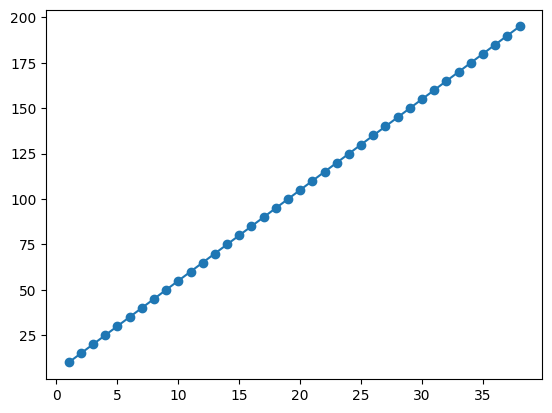

<Figure size 640x480 with 0 Axes>

In [16]:
model_2stations_closed.analyze_results()

## Complex System

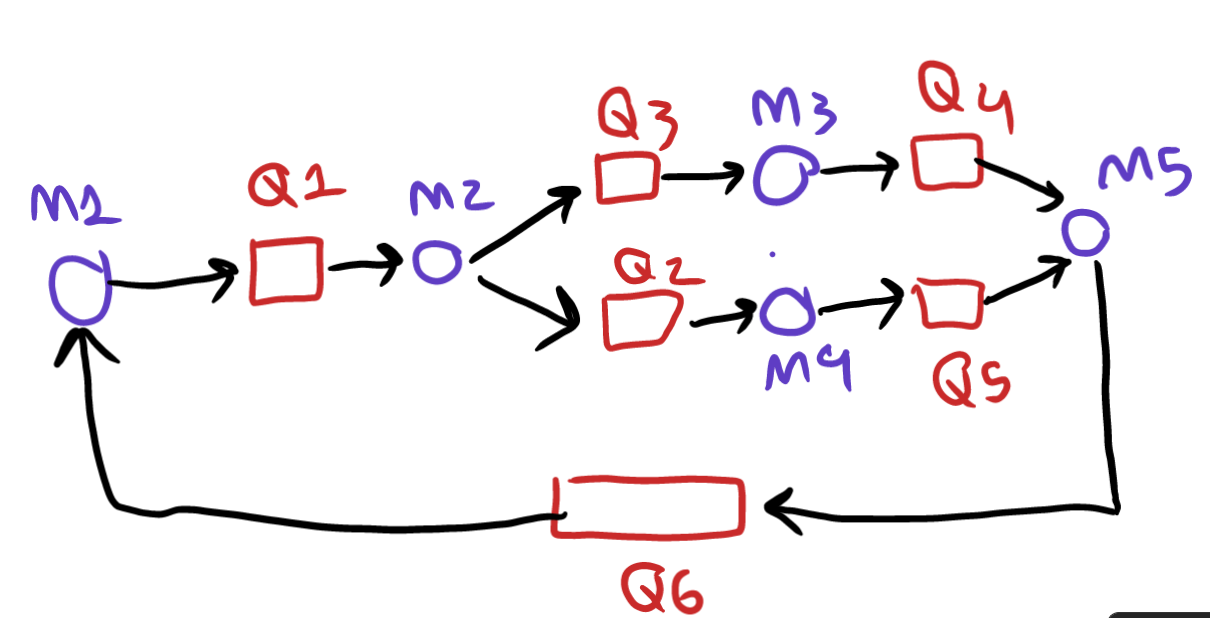

In [23]:
environment = simpy.Environment()

model_complex_path = "models\model_complex.json"
model_complex = Model(name= "model_complex",model_path= model_complex_path, initial=True, env= environment, until= 2000)
model_complex.model_translator()
model_complex.verbose()

==========  Reading the Model: model_complex  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 6

===>Detailed view of Queues:
----------------
Queue 1

--Intrinsic Properties--
Arc links: [1, 2]
Capacity: 10

--Current Status--
Parts stored: Part 1
Queue Lenght: 1
----------------
----------------
Queue 2

--Intrinsic Properties--
Arc links: [2, 4]
Capacity: 10

--Current Status--
Queue Lenght: 0
----------------
----------------
Queue 3

--Intrinsic Properties--
Arc links: [2, 3]
Capacity: 10

--Current Status--
Parts stored: Part 2
Parts stored: Part 3
Queue Lenght: 2
----------------
----------------
Queue 4

--Intrinsic Properties--
Arc links: [3, 5]
Capacity: 10

--Current Status--
Queue Lenght: 0
----------------
----------------
Queue 5

--Intrinsic Properties--
Arc links: [4, 5]
Capacity: 10

--Current Status--
Parts stored: Part 4
Parts stored: Part 5
Parts stored: Part 6
Queue Lenght: 3
----------------
----------------
Queue 6

--Intrinsic Pro

In [24]:
model_complex.run()

Time: 0 - Machine 1 got Part 7
Time: 0 - Machine 2 got Part 1
Time: 0 - Machine 3 got Part 2
Time: 0 - Machine 5 got Part 4
Time: 5 - Machine 1 put Part 7 in Queue 1
Time: 5 - Machine 1 got Part 8
Time: 5 - Machine 2 put Part 1 in Queue 2
Time: 5 - Machine 2 got Part 7
Time: 5 - Machine 3 put Part 2 in Queue 4
Time: 5 - Machine 3 got Part 3
Time: 5 - xxx Part 4 terminated xxx
Time: 5 - Part 11 replaced
Time: 5 - Machine 5 got Part 2
Time: 5 - Machine 4 got Part 1
Time: 10 - Machine 1 put Part 8 in Queue 1
Time: 10 - Machine 1 got Part 9
Time: 10 - Machine 2 put Part 7 in Queue 2
Time: 10 - Machine 2 got Part 8
Time: 10 - Machine 3 put Part 3 in Queue 4
Time: 10 - xxx Part 2 terminated xxx
Time: 10 - Part 12 replaced
Time: 10 - Machine 5 got Part 3
Time: 10 - Machine 4 put Part 1 in Queue 5
Time: 10 - Machine 4 got Part 7
Time: 15 - Machine 1 put Part 9 in Queue 1
Time: 15 - Machine 1 got Part 10
Time: 15 - Machine 2 put Part 8 in Queue 2
Time: 15 - Machine 2 got Part 9
Time: 15 - xxx P

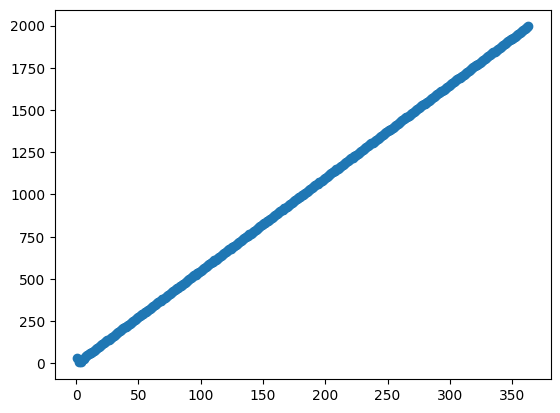

<Figure size 640x480 with 0 Axes>

In [22]:
model_complex.analyze_results()